In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.linear_model import LinearRegression

In [2]:
n=10000
m=2
rng = np.random.default_rng()

In [3]:
links=[(0,1),(1,0)]
nodes=[1,1]

for new_node in range(m,n):
    nodes_sum=sum(nodes)
    p=[deg / nodes_sum for deg in nodes]

    targets=rng.choice(range(0,new_node), size=m, p=p, replace=False)
    for target in targets:
        links.append((new_node, target))
        links.append((target, new_node))
        if new_node>=len(nodes):
            nodes.append(1)
        else:
            nodes[new_node]+=1
        nodes[target]+=1

In [4]:
df_B = pd.DataFrame(links) 
G = nx.from_pandas_edgelist(df_B, source=0, target=1, create_using=nx.DiGraph())
k_out = df_B[0].value_counts()

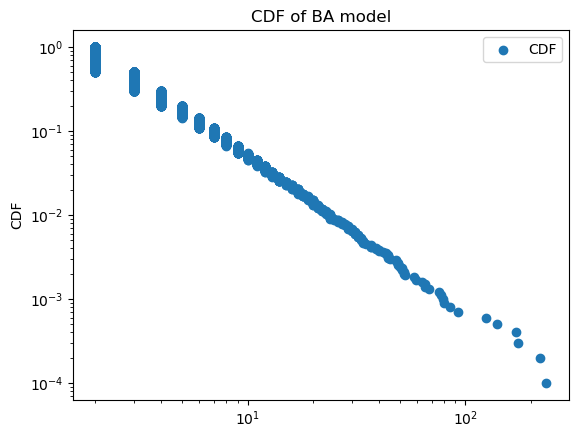

In [5]:
x=np.sort(k_out)
y = np.arange(len(x), 0, -1) / len(x)

plt.title("CDF of BA model")
plt.ylabel("CDF")
plt.xscale("log")
plt.yscale("log")
plt.scatter(x, y, label='CDF')
plt.legend()
plt.savefig("PDA_230868_15_1.png")
plt.show()

In [8]:
#fitting
fit=(x>=10) & (x<1000)
part_x = x[fit]
part_y = y[fit]
log_part_x = np.log(part_x)
log_part_y = np.log(part_y)
model = LinearRegression()
model.fit(log_part_x.reshape(-1,1), log_part_y)

gamma_data = -model.coef_[0]
gamma_data

1.8564347491883757